<a href="https://colab.research.google.com/github/amidhruvi/CIN820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install vaderSentiment
!pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=dc94a809a77ee135199e984e7fd9255187b66520bcfe2ea719eab62244c4ba35
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


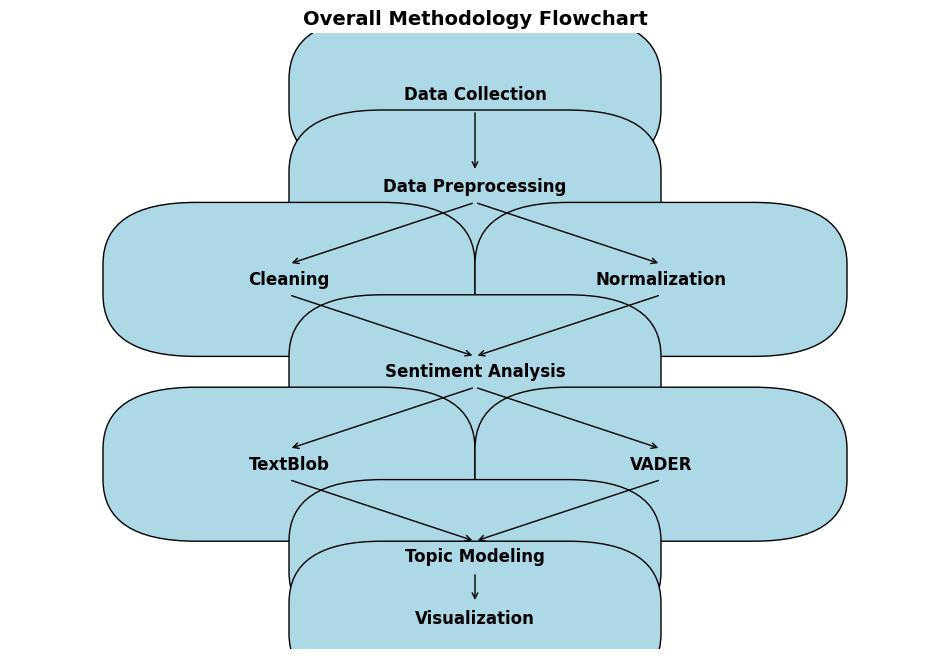

In [ ]:
#Flowchart Diagram
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions of the boxes
positions = {
    "Data Collection": (0.5, 0.9),
    "Data Preprocessing": (0.5, 0.75),
    "Cleaning": (0.3, 0.6),
    "Normalization": (0.7, 0.6),
    "Sentiment Analysis": (0.5, 0.45),
    "TextBlob": (0.3, 0.3),
    "VADER": (0.7, 0.3),
    "Topic Modeling": (0.5, 0.15),
    "Visualization": (0.5, 0.05)
}

# Add boxes to the flowchart
for key, (x, y) in positions.items():
    ax.add_patch(patches.FancyBboxPatch((x - 0.1, y - 0.025), 0.2, 0.05, boxstyle="round,pad=0.1",
                                         edgecolor="black", facecolor="lightblue"))
    ax.text(x, y, key, ha="center", va="center", fontsize=12, fontweight='bold')

# Define the arrows between the boxes
arrows = [
    ("Data Collection", "Data Preprocessing"),
    ("Data Preprocessing", "Cleaning"),
    ("Data Preprocessing", "Normalization"),
    ("Cleaning", "Sentiment Analysis"),
    ("Normalization", "Sentiment Analysis"),
    ("Sentiment Analysis", "TextBlob"),
    ("Sentiment Analysis", "VADER"),
    ("TextBlob", "Topic Modeling"),
    ("VADER", "Topic Modeling"),
    ("Topic Modeling", "Visualization")
]

# Add arrows to the flowchart
for start, end in arrows:
    sx, sy = positions[start]
    ex, ey = positions[end]
    ax.annotate('', xy=(ex, ey + 0.025), xytext=(sx, sy - 0.025),
                arrowprops=dict(arrowstyle="->", color='black'))

# Set the limits and title
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Overall Methodology Flowchart', fontsize=14, fontweight='bold')
ax.axis('off')  # Hide the axes

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/contracts.csv'
data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Display the column names
print(data.columns)


<ipython-input-17-a68038c2cbe3>:5: DtypeWarning: Columns (3,4,6,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')


Index(['ï»¿reference_number', 'procurement_id', 'vendor_name',
       'vendor_postal_code', 'buyer_name', 'contract_date',
       'economic_object_code', 'description_en', 'description_fr',
       'contract_period_start', 'delivery_date', 'contract_value',
       'original_value', 'amendment_value', 'comments_en', 'comments_fr',
       'additional_comments_en', 'additional_comments_fr',
       'agreement_type_code', 'trade_agreement', 'land_claims',
       'commodity_type', 'commodity_code', 'country_of_vendor',
       'solicitation_procedure', 'limited_tendering_reason',
       'trade_agreement_exceptions', 'indigenous_business',
       'indigenous_business_excluding_psib', 'intellectual_property',
       'potential_commercial_exploitation', 'former_public_servant',
       'contracting_entity', 'standing_offer_number', 'instrument_type',
       'ministers_office', 'number_of_bids', 'article_6_exceptions',
       'award_criteria', 'socioeconomic_indicator', 'reporting_period',
       '

In [ ]:
import pandas as pd

# Load the dataset with a different encoding and skip bad lines
file_path = '/content/contracts.csv'
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Display the first few rows
print(df.head())

# Display the column names to check for any discrepancies
print(df.columns)

<ipython-input-5-881e00b79188>:5: DtypeWarning: Columns (3,4,6,19,20,25,26,27,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')


  ï»¿reference_number procurement_id                vendor_name  \
0    C-2019-2020-Q4-1       P2000002         Simzer Design Inc.   
1    C-2019-2020-Q4-2       P2000004           Breckenhill Inc.   
2    C-2019-2020-Q4-3       P2000009  Spinal Cord Injury Canada   
3    C-2019-2020-Q4-4       P2000011                  CSA Group   
4    C-2019-2020-Q4-5       P2000014         Simzer Design Inc.   

  vendor_postal_code buyer_name contract_date economic_object_code  \
0                NaN        NaN    2020-02-26                351.0   
1                NaN        NaN    2020-02-26                499.0   
2                NaN        NaN    2020-03-11                494.0   
3                NaN        NaN    2020-03-11                491.0   
4                NaN        NaN    2020-03-20                351.0   

                                      description_en  \
0  Communications professional services not elsew...   
1  Other professional services not elsewhere spec...   
2       

In [ ]:
# Load the dataset to inspect its columns and structure
file_path = '/content/contracts.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows and the column names to identify the correct columns
print(data.head())
print(data.columns)

<ipython-input-6-5a1c5f4b47a3>:3: DtypeWarning: Columns (3,4,6,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   reference_number procurement_id                vendor_name  \
0  C-2019-2020-Q4-1       P2000002         Simzer Design Inc.   
1  C-2019-2020-Q4-2       P2000004           Breckenhill Inc.   
2  C-2019-2020-Q4-3       P2000009  Spinal Cord Injury Canada   
3  C-2019-2020-Q4-4       P2000011                  CSA Group   
4  C-2019-2020-Q4-5       P2000014         Simzer Design Inc.   

  vendor_postal_code buyer_name contract_date economic_object_code  \
0                NaN        NaN    2020-02-26                351.0   
1                NaN        NaN    2020-02-26                499.0   
2                NaN        NaN    2020-03-11                494.0   
3                NaN        NaN    2020-03-11                491.0   
4                NaN        NaN    2020-03-20                351.0   

                                      description_en  \
0  Communications professional services not elsew...   
1  Other professional services not elsewhere spec...   
2                   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-5-f87c3e529214>:20: DtypeWarning: Columns (3,4,6,19,27,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')


Index(['ï»¿reference_number', 'procurement_id', 'vendor_name',
       'vendor_postal_code', 'buyer_name', 'contract_date',
       'economic_object_code', 'description_en', 'description_fr',
       'contract_period_start', 'delivery_date', 'contract_value',
       'original_value', 'amendment_value', 'comments_en', 'comments_fr',
       'additional_comments_en', 'additional_comments_fr',
       'agreement_type_code', 'trade_agreement', 'land_claims',
       'commodity_type', 'commodity_code', 'country_of_vendor',
       'solicitation_procedure', 'limited_tendering_reason',
       'trade_agreement_exceptions', 'indigenous_business',
       'indigenous_business_excluding_psib', 'intellectual_property',
       'potential_commercial_exploitation', 'former_public_servant',
       'contracting_entity', 'standing_offer_number', 'instrument_type',
       'ministers_office', 'number_of_bids', 'article_6_exceptions',
       'award_criteria', 'socioeconomic_indicator', 'reporting_period',
       '

Pandas Apply:   0%|          | 0/48201 [00:00<?, ?it/s]

                 vendor_name               cleaned_text
0         Simzer Design Inc.          Simzer Design Inc
1           Breckenhill Inc.            Breckenhill Inc
2  Spinal Cord Injury Canada  Spinal Cord Injury Canada
3                  CSA Group                  CSA Group
4         Simzer Design Inc.          Simzer Design Inc
                cleaned_text            normalized_text
0          Simzer Design Inc          simzer design inc
1            Breckenhill Inc            breckenhill inc
2  Spinal Cord Injury Canada  spinal cord injury canada
3                  CSA Group                  csa group
4          Simzer Design Inc          simzer design inc
             normalized_text  textblob_sentiment  vader_sentiment
0          simzer design inc                 0.0           0.0000
1            breckenhill inc                 0.0           0.0000
2  spinal cord injury canada                 0.0          -0.4215
3                  csa group                 0.0           0.000

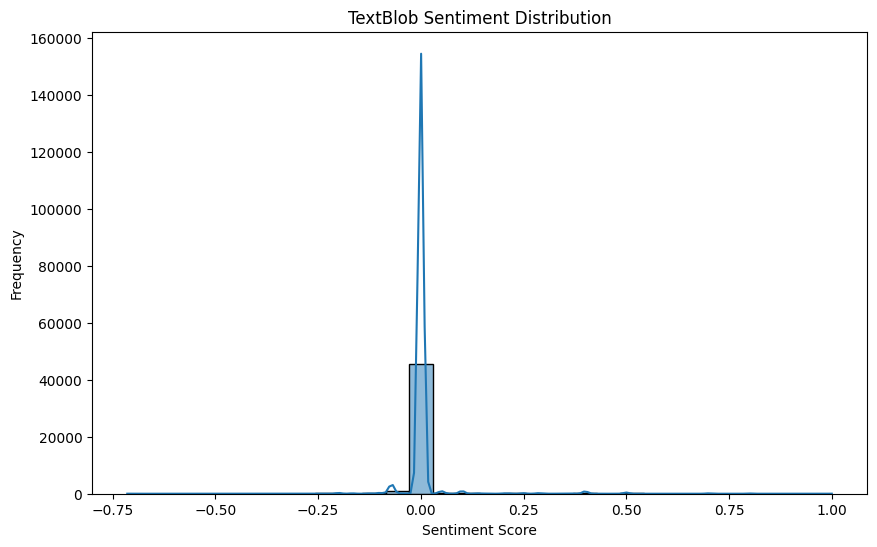

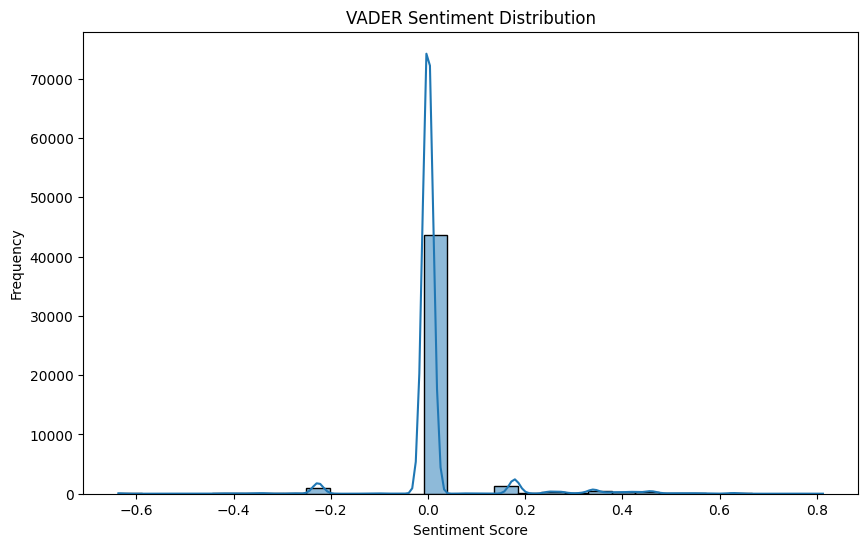

In [ ]:
#Data cleaning
import re
import nltk
import swifter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
file_path = '/content/contracts.csv'
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Display the column names to identify the correct text column
print(df.columns)

# Assuming the column containing text data is identified, e.g., 'vendor_name'
text_column = 'vendor_name'  # Replace this with the correct column name

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stop words
        tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
        # Lemmatize the tokens
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    else:
        return ''

# Apply the cleaning function to the text column using swifter
df['cleaned_text'] = df[text_column].swifter.apply(clean_text)

# Display the cleaned text
print(df[[text_column, 'cleaned_text']].head())

# Function to normalize text
def normalize_text(text):
    return text.lower()

# Apply the normalization function
df['normalized_text'] = df['cleaned_text'].apply(normalize_text)

# Display the normalized text
print(df[['cleaned_text', 'normalized_text']].head())

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to get sentiment using VADER
def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

# Apply sentiment analysis
df['textblob_sentiment'] = df['normalized_text'].apply(get_textblob_sentiment)
df['vader_sentiment'] = df['normalized_text'].apply(get_vader_sentiment)

# Display the sentiment scores
print(df[['normalized_text', 'textblob_sentiment', 'vader_sentiment']].head())

# Plot TextBlob sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['textblob_sentiment'], bins=30, kde=True)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot VADER sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['vader_sentiment'], bins=30, kde=True)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-f5ed5225679d>:7: DtypeWarning: Columns (3,4,6,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')


Index(['ï»¿reference_number', 'procurement_id', 'vendor_name',
       'vendor_postal_code', 'buyer_name', 'contract_date',
       'economic_object_code', 'description_en', 'description_fr',
       'contract_period_start', 'delivery_date', 'contract_value',
       'original_value', 'amendment_value', 'comments_en', 'comments_fr',
       'additional_comments_en', 'additional_comments_fr',
       'agreement_type_code', 'trade_agreement', 'land_claims',
       'commodity_type', 'commodity_code', 'country_of_vendor',
       'solicitation_procedure', 'limited_tendering_reason',
       'trade_agreement_exceptions', 'indigenous_business',
       'indigenous_business_excluding_psib', 'intellectual_property',
       'potential_commercial_exploitation', 'former_public_servant',
       'contracting_entity', 'standing_offer_number', 'instrument_type',
       'ministers_office', 'number_of_bids', 'article_6_exceptions',
       'award_criteria', 'socioeconomic_indicator', 'reporting_period',
       '

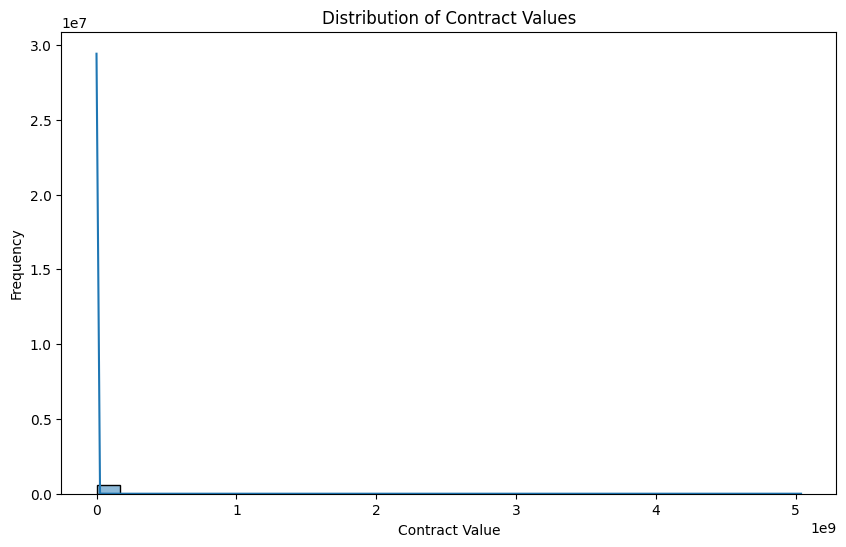

In [ ]:
#univariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with a different encoding and skip bad lines
file_path = '/content/contracts.csv'
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Check the column names to find the appropriate one for 'Contract Value'
print(df.columns)

# Replace 'Contract Value' with the actual column name in the dataset
contract_value_column = 'contract_value'  # Adjust this to match your dataset

# Convert the contract value column to numeric, errors='coerce' will handle non-numeric values
df[contract_value_column] = pd.to_numeric(df[contract_value_column], errors='coerce')

# Drop rows with NaN values in the contract value column
df = df.dropna(subset=[contract_value_column])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[contract_value_column], bins=30, kde=True)
plt.title('Distribution of Contract Values')
plt.xlabel('Contract Value')
plt.ylabel('Frequency')
plt.show()


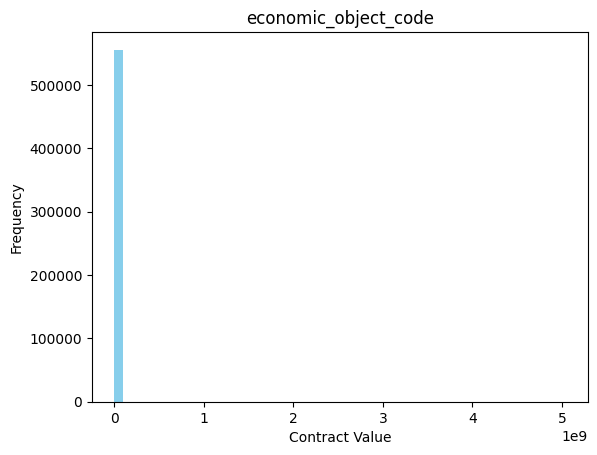

In [ ]:
#univariate analysis
import matplotlib.pyplot as plt

# Replace 'contract_value' with the actual column name in your dataset
contract_value_column = 'contract_value'  # Adjust this to match your dataset

# Convert the contract value column to numeric, errors='coerce' will handle non-numeric values
data[contract_value_column] = pd.to_numeric(data[contract_value_column], errors='coerce')

# Drop rows with NaN values in the contract value column
data = data.dropna(subset=[contract_value_column])

# Plot Contract Value Distribution
#plt.figure(figsize=(10, 6))
data[contract_value_column].plot(kind='hist', bins=50, color='skyblue')
plt.title('economic_object_code')
plt.xlabel('Contract Value')
plt.ylabel('Frequency')
plt.show()


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


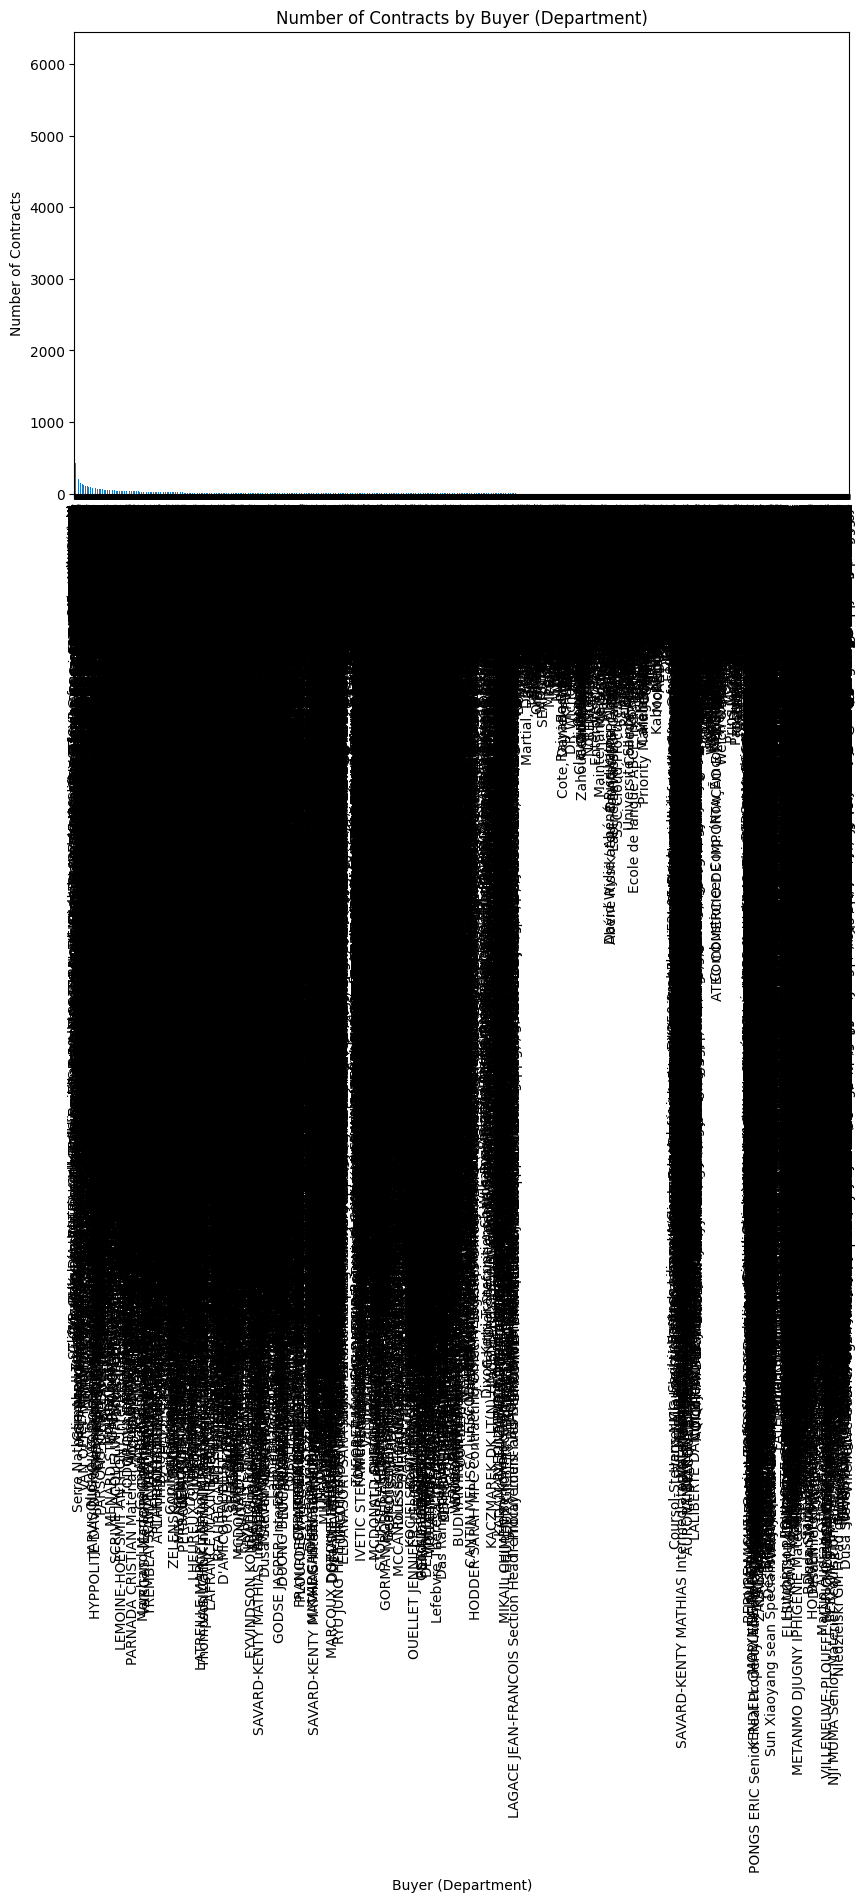

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


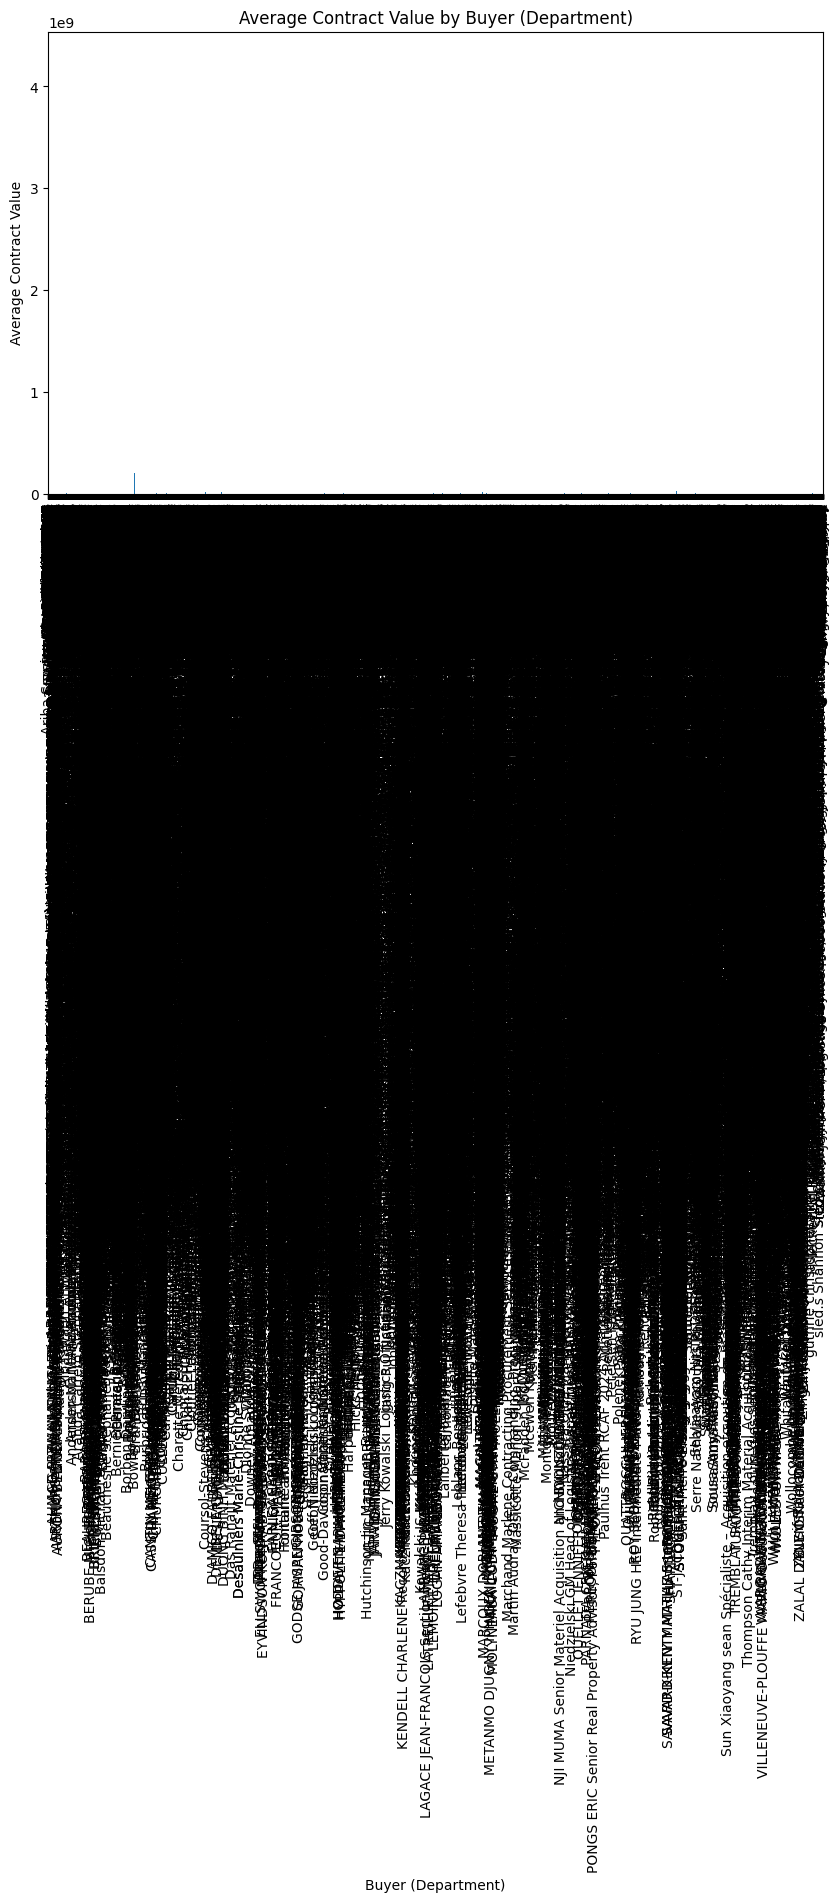

In [ ]:
#univariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Basic cleaning
data.dropna(subset=['buyer_name', 'contract_value'], inplace=True)  # Remove rows with null values in key columns
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Univariate Analysis: Number of contracts by buyer_name (Department equivalent)
contracts_by_buyer = data['buyer_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
contracts_by_buyer.plot(kind='bar')
plt.title('Number of Contracts by Buyer (Department)')
plt.xlabel('Buyer (Department)')
plt.ylabel('Number of Contracts')
plt.show()

# Univariate Analysis: Average contract value by buyer_name (Department equivalent)
average_contract_value = data.groupby('buyer_name')['contract_value'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_contract_value.plot(kind='bar')
plt.title('Average Contract Value by Buyer (Department)')
plt.xlabel('Buyer (Department)')
plt.ylabel('Average Contract Value')
plt.show()


   reference_number procurement_id                vendor_name  \
0  C-2019-2020-Q4-1       P2000002         Simzer Design Inc.   
1  C-2019-2020-Q4-2       P2000004           Breckenhill Inc.   
2  C-2019-2020-Q4-3       P2000009  Spinal Cord Injury Canada   
3  C-2019-2020-Q4-4       P2000011                  CSA Group   
4  C-2019-2020-Q4-5       P2000014         Simzer Design Inc.   

  vendor_postal_code buyer_name contract_date economic_object_code  \
0                NaN        NaN    2020-02-26                 0351   
1                NaN        NaN    2020-02-26                 0499   
2                NaN        NaN    2020-03-11                 0494   
3                NaN        NaN    2020-03-11                 0491   
4                NaN        NaN    2020-03-20                 0351   

                                      description_en  \
0  Communications professional services not elsew...   
1  Other professional services not elsewhere spec...   
2                   

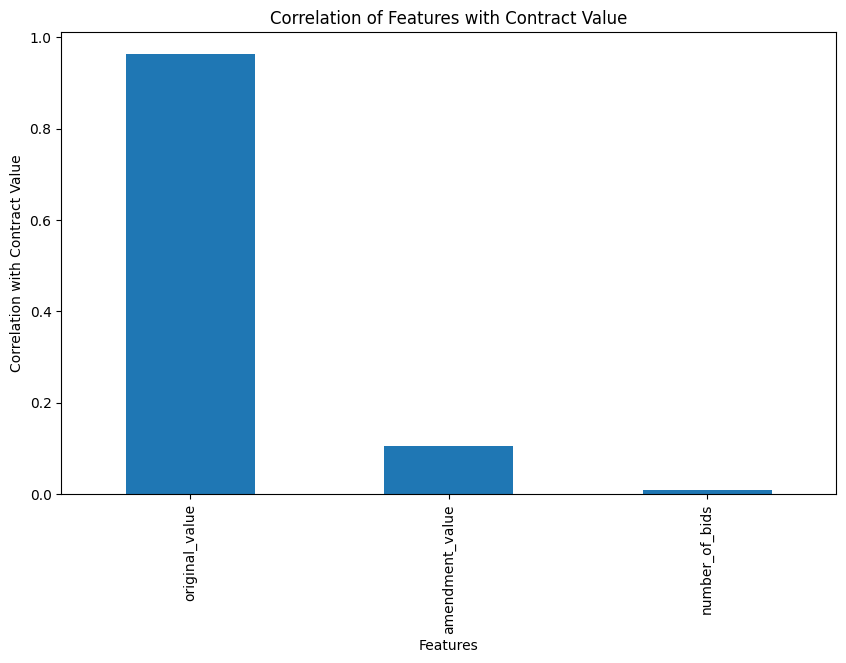

In [ ]:
#correlation analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/contracts.csv'  # replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows and the column names to identify the correct columns
print(data.head())
print(data.columns)

# Basic cleaning
data.dropna(subset=['buyer_name', 'contract_value'], inplace=True)  # Remove rows with null values in key columns
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Select only the numeric columns for correlation analysis
numeric_columns = ['contract_value', 'original_value', 'amendment_value', 'number_of_bids']
numeric_data = data[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, set errors to NaN

# Drop rows with NaN values in numeric columns
numeric_data.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting correlation of each variable with 'contract_value'
correlation_with_value = correlation_matrix['contract_value'].drop('contract_value')

plt.figure(figsize=(10, 6))
correlation_with_value.plot(kind='bar')
plt.title('Correlation of Features with Contract Value')
plt.xlabel('Features')
plt.ylabel('Correlation with Contract Value')
plt.show()

In [ ]:
#data cleaning
import pandas as pd
import re

# Load the dataset
file_path = '/content/contracts.csv'  # replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows and the column names to identify the correct columns
print(data.head())
print(data.columns)

# Basic cleaning steps
data.dropna(subset=['buyer_name', 'contract_value'], inplace=True)  # Remove rows with null values in key columns
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Example of text normalization (for text fields, if any)
def clean_text(text):
    if isinstance(text, str):  # Ensure the value is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text
    return text  # Return the value as is if it's not a string

# Apply text cleaning to relevant columns
if 'description_en' in data.columns:
    data['description_en'] = data['description_en'].apply(clean_text)

print(data.head())

   reference_number procurement_id                vendor_name  \
0  C-2019-2020-Q4-1       P2000002         Simzer Design Inc.   
1  C-2019-2020-Q4-2       P2000004           Breckenhill Inc.   
2  C-2019-2020-Q4-3       P2000009  Spinal Cord Injury Canada   
3  C-2019-2020-Q4-4       P2000011                  CSA Group   
4  C-2019-2020-Q4-5       P2000014         Simzer Design Inc.   

  vendor_postal_code buyer_name contract_date economic_object_code  \
0                NaN        NaN    2020-02-26                 0351   
1                NaN        NaN    2020-02-26                 0499   
2                NaN        NaN    2020-03-11                 0494   
3                NaN        NaN    2020-03-11                 0491   
4                NaN        NaN    2020-03-20                 0351   

                                      description_en  \
0  Communications professional services not elsew...   
1  Other professional services not elsewhere spec...   
2                   

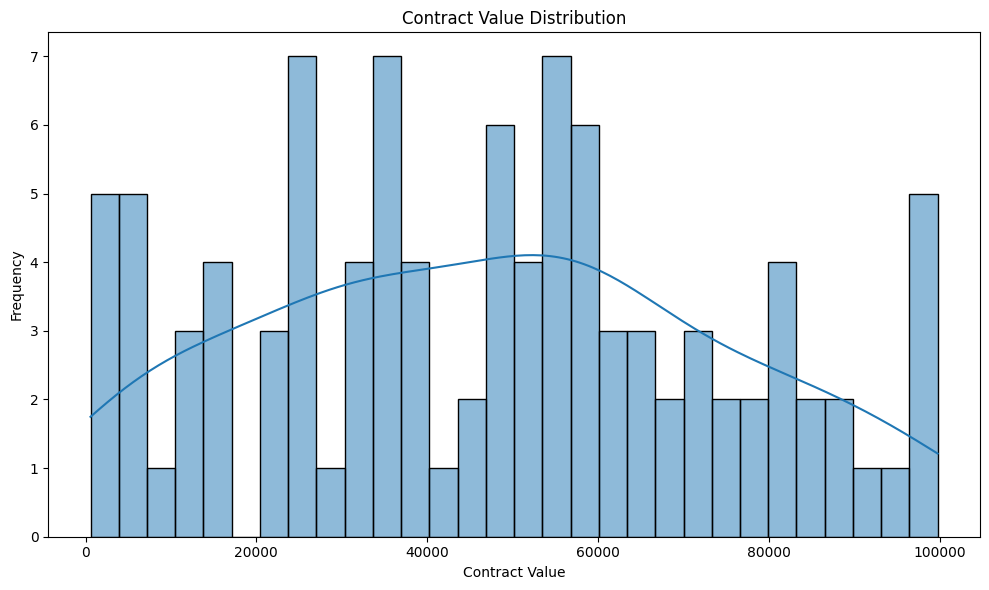

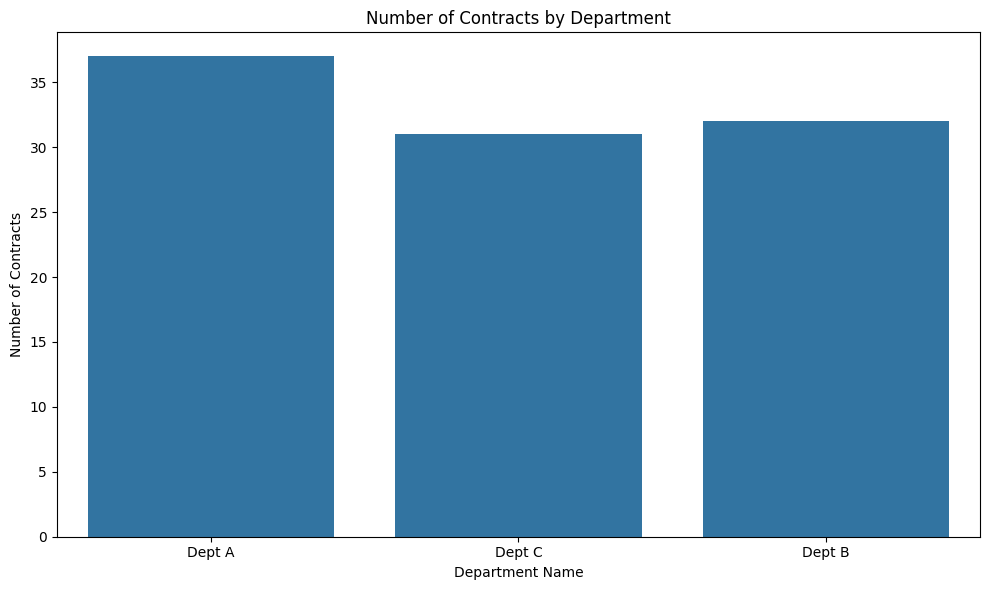

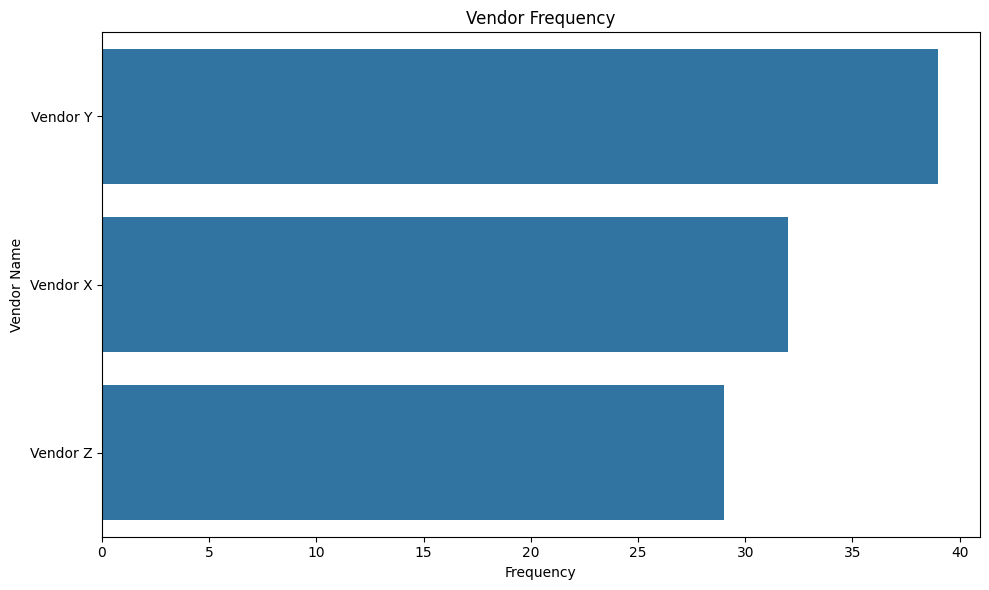

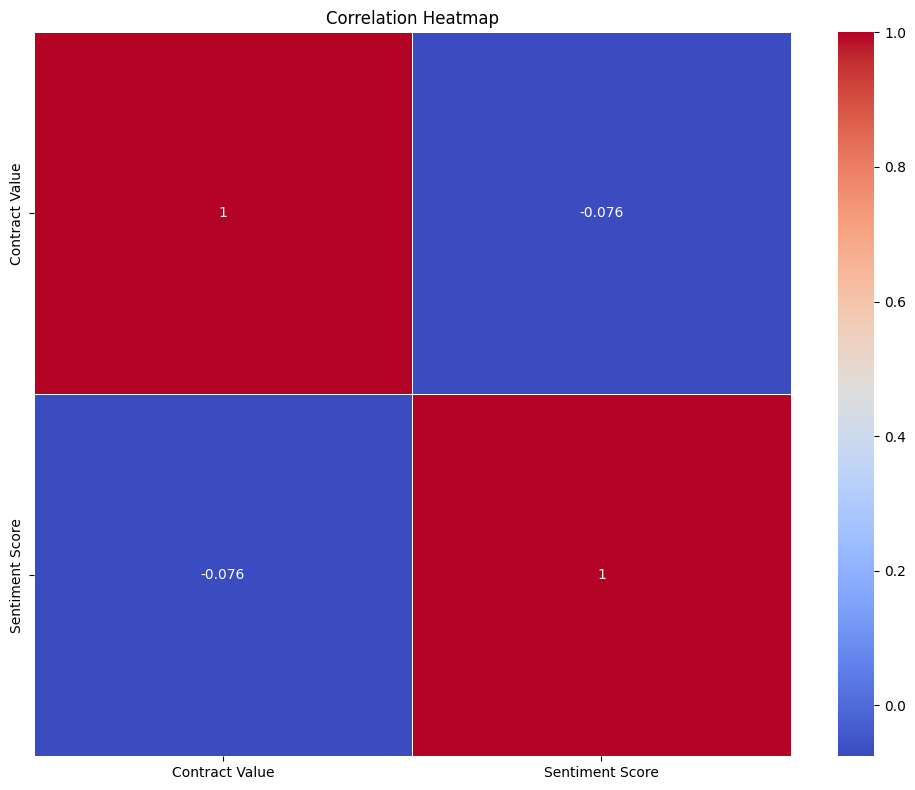

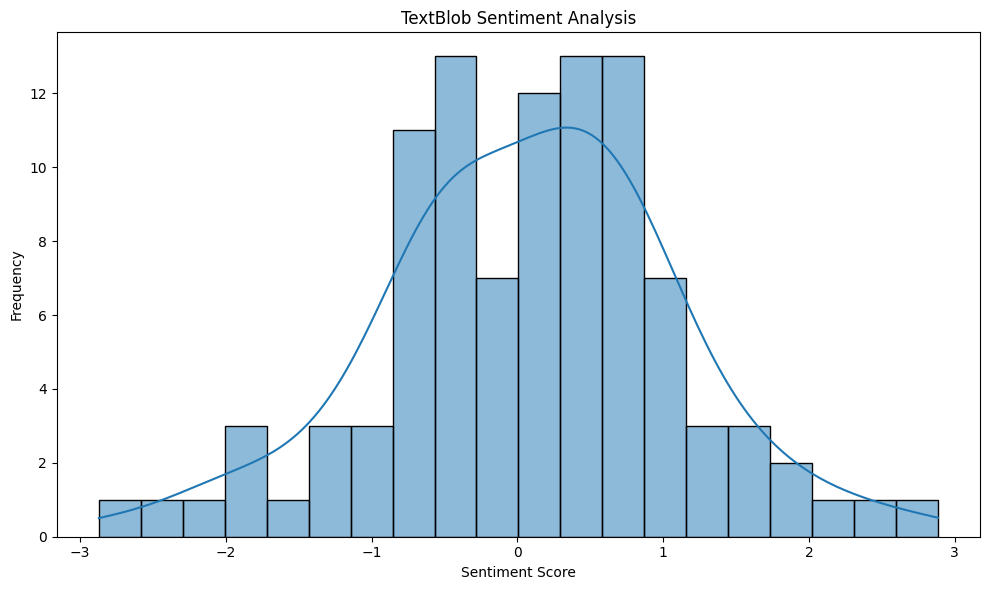

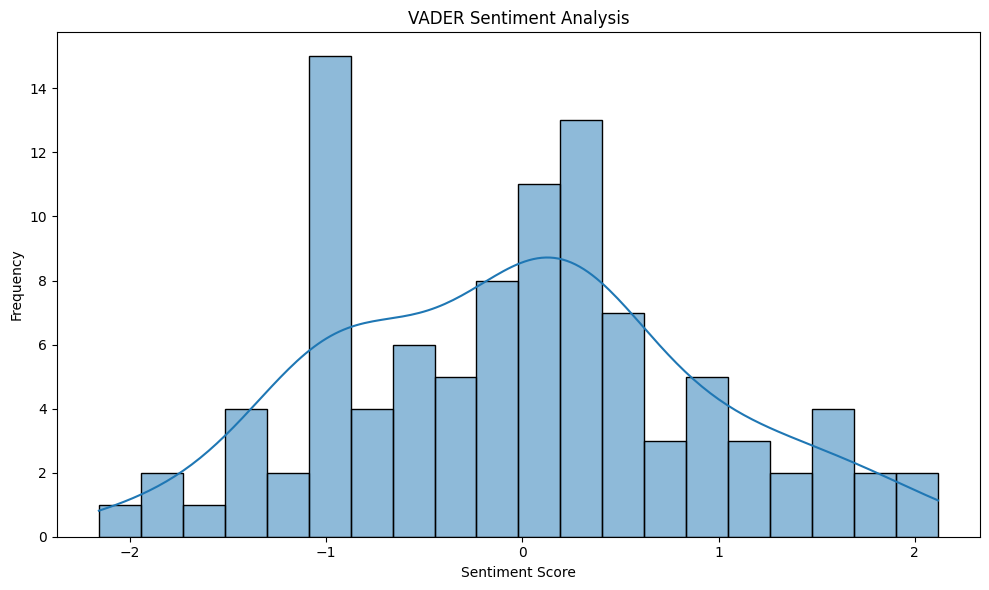

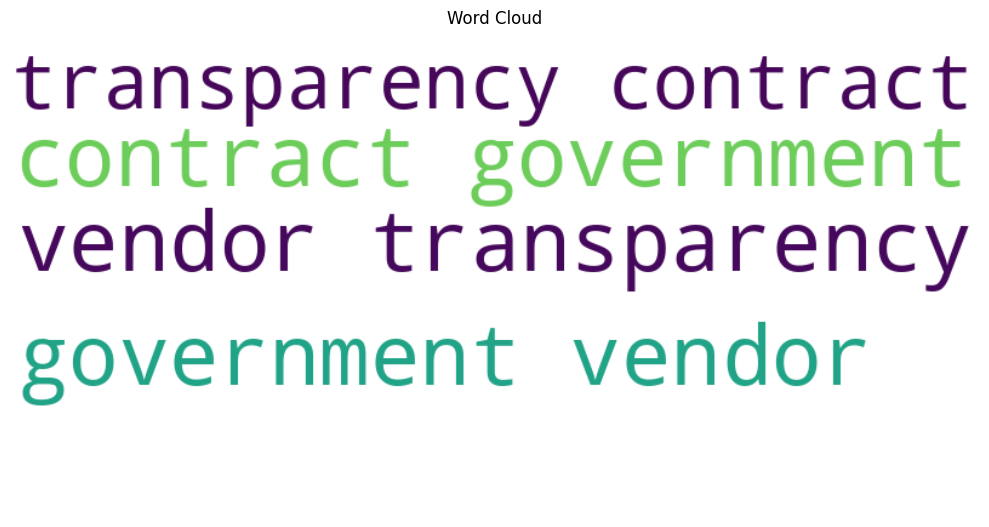

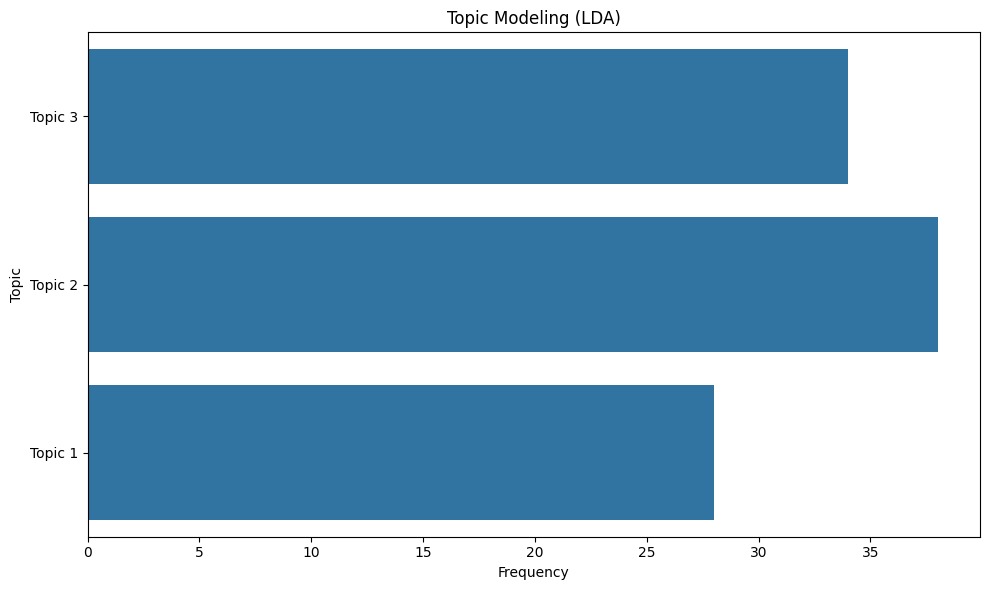

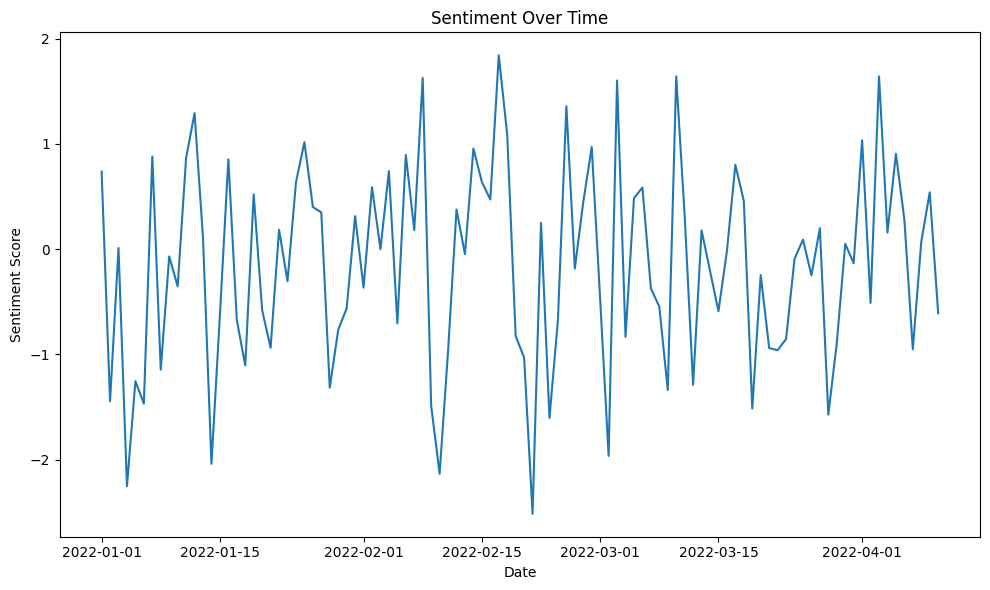

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud

# Make sure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Sample data for illustration
data = {
    'Contract Value': np.random.rand(100) * 100000,
    'Department Name': np.random.choice(['Dept A', 'Dept B', 'Dept C'], 100),
    'Vendor Name': np.random.choice(['Vendor X', 'Vendor Y', 'Vendor Z'], 100),
    'Sentiment Score': np.random.randn(100)
}

df = pd.DataFrame(data)
# Figure 1: Contract Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Contract Value'], bins=30, kde=True)
plt.title('Contract Value Distribution')
plt.xlabel('Contract Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'contract_value_distribution.png'))

# Figure 2: Number of Contracts by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department Name', data=df)
plt.title('Number of Contracts by Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Contracts')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'contracts_by_department.png'))

# Figure 3: Vendor Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='Vendor Name', data=df)
plt.title('Vendor Frequency')
plt.xlabel('Frequency')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vendor_frequency.png'))

# Figure 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))

# Figure 5: TextBlob Sentiment Analysis (Dummy Data)
textblob_scores = np.random.randn(100)
plt.figure(figsize=(10, 6))
sns.histplot(textblob_scores, bins=20, kde=True)
plt.title('TextBlob Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'textblob_sentiment_analysis.png'))

# Figure 6: VADER Sentiment Analysis (Dummy Data)
vader_scores = np.random.randn(100)
plt.figure(figsize=(10, 6))
sns.histplot(vader_scores, bins=20, kde=True)
plt.title('VADER Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vader_sentiment_analysis.png'))

# Figure 7: Word Cloud
text = ' '.join(['contract', 'government', 'vendor', 'transparency'] * 100)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'word_cloud.png'))

# Figure 8: Topic Modeling (Dummy Data for LDA)
topics = np.random.choice(['Topic 1', 'Topic 2', 'Topic 3'], 100)
plt.figure(figsize=(10, 6))
sns.countplot(y=topics)
plt.title('Topic Modeling (LDA)')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'topic_modeling.png'))

# Figure 9: Sentiment Over Time (Dummy Data)
df['Date'] = pd.date_range(start='2022-01-01', periods=100, freq='D')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sentiment Score', data=df)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'sentiment_over_time.png'))

plt.show()
